In [10]:
from os.path import isdir, join as join_path
from functools import partial
from warnings import filterwarnings
from os import mkdir
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import itertools
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns # pip install seaborn
from matplotlib.ticker import LinearLocator, FormatStrFormatter
filterwarnings('ignore')
DATA_DIR = 'flights'
to_data_dir = partial(join_path, DATA_DIR)
if not isdir(DATA_DIR):
    mkdir(DATA_DIR)
data = pd.read_csv(r'C:\Users\tosha\PycharmProjects\Education\flights\flight_delays.csv', decimal = '.', sep = ',')

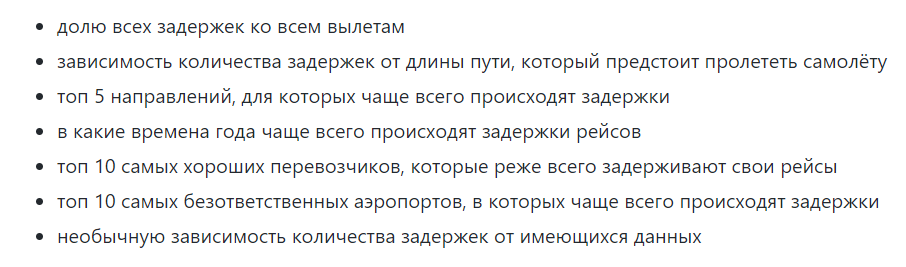

In [11]:
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [12]:
data.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [13]:
print(data['Month'][1])

c-4


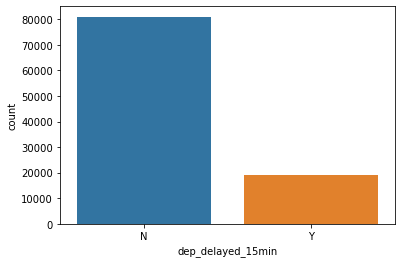

In [14]:
sns.countplot(x='dep_delayed_15min', data = data)

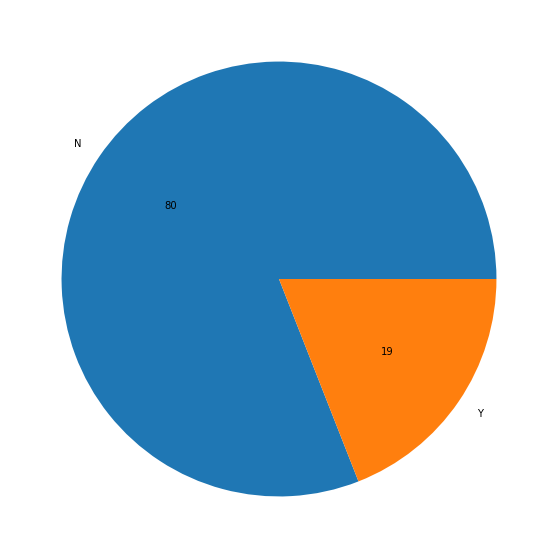

In [15]:
plt.figure(figsize = (15,10))
plt.pie(data.groupby('dep_delayed_15min')['Dest'].count(), labels=['N', 'Y'], autopct = '%d')
plt.show()


In [16]:
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [17]:
a = []
for i in range(10):
    a.append(data[(data['Distance'] >= 0 + 500*i) & (data['Distance'] <= 500 + i*500) & (data['dep_delayed_15min'] == 'Y')])
y = []
for p in a:
    y.append(p['dep_delayed_15min'].count())
x = []
for i in range(1,11):
    x.append(i*500)
print(y)

[8110, 6678, 2387, 1140, 568, 167, 5, 2, 11, 4]


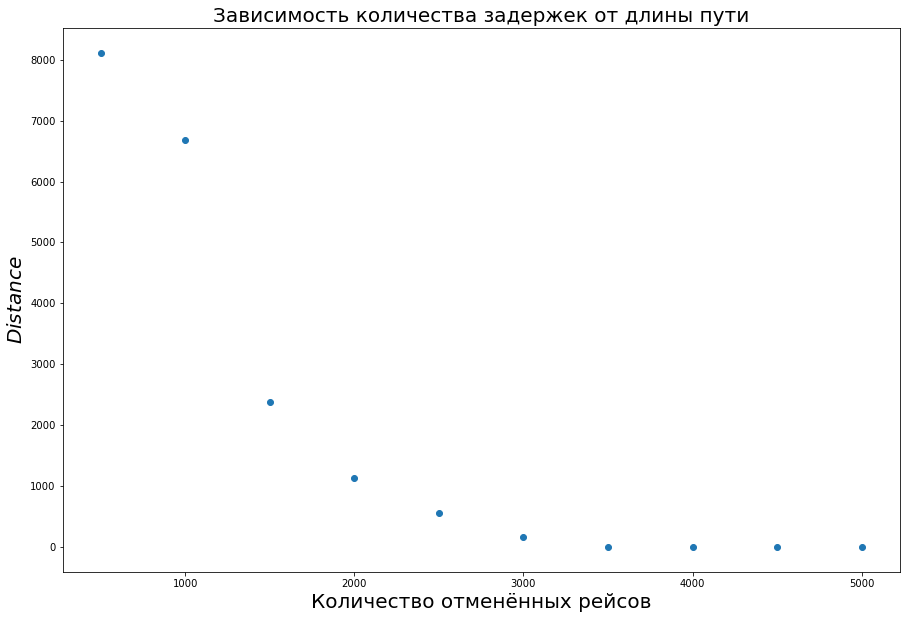

In [18]:
plt.figure(figsize = (15,10))
plt.xlabel('Количество отменённых рейсов',fontsize = 20)
plt.ylabel('$Distance$', fontsize=20)
plt.title('Зависимость количества задержек от длины пути',fontsize = 20)
plt.scatter(x,y)
plt.show()

In [19]:
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [20]:
indexes = []
a = []
maximums = []
companies = []
dest_unique = np.unique(np.array(data['Dest']))
for i in range(len(dest_unique)):
    a.append((data[(data['Dest'] == dest_unique[i]) & (data['dep_delayed_15min'] == 'Y')]).dep_delayed_15min.count())
for p in range(5):
    maximums.append(max(a))
    indexes.append(a.index(max(a)))
    a[a.index(max(a))] = 0
for i in indexes:
    companies.append(dest_unique[i])
print(maximums)

[1281, 1072, 656, 584, 525]


No handles with labels found to put in legend.


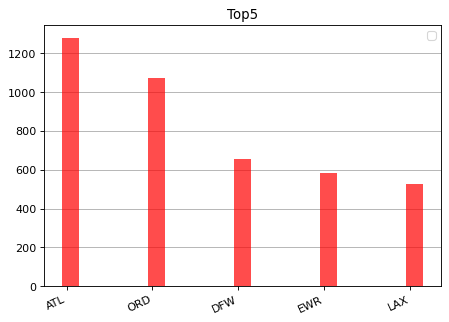

In [21]:
#!/usr/bin/env python3
# vim: set ai et ts=4 sw=4:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv


dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.title('Top5')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

xs = range(len(companies))

plt.bar([x + 0.05 for x in xs], [ d  for d in maximums],
        width = 0.2, color = 'red', alpha = 0.7,
        zorder = 2)

plt.xticks(xs, companies)

fig.autofmt_xdate(rotation = 25)

plt.legend(loc='upper right')
fig.savefig('bars.png')


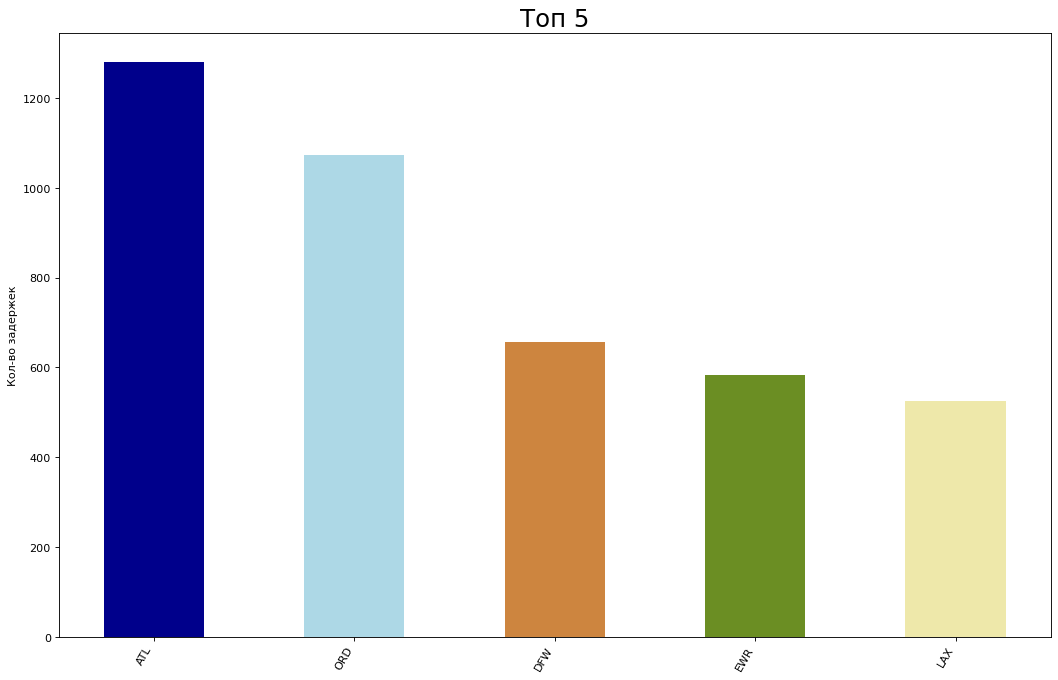

In [22]:
import random
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
n = len(companies)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(companies, maximums, color=c, width=.5)


# Decoration
plt.gca().set_xticklabels(companies, rotation=60, horizontalalignment= 'right')
plt.title("Топ 5", fontsize=22)
plt.ylabel('Кол-во задержек')
plt.show()


In [34]:
mes = []
dates = []
for i in range (1,13):
    mes.append((data[(data['Month'] == 'c-' + str(i)) & (data['dep_delayed_15min'] == 'Y')]).dep_delayed_15min.count())
    dates.append('c-' + str(i))

In [35]:
print(mes)
print(dates)


[1539, 1316, 1676, 1306, 1313, 1867, 2073, 1783, 1279, 1501, 1397, 1994]
['c-1', 'c-2', 'c-3', 'c-4', 'c-5', 'c-6', 'c-7', 'c-8', 'c-9', 'c-10', 'c-11', 'c-12']


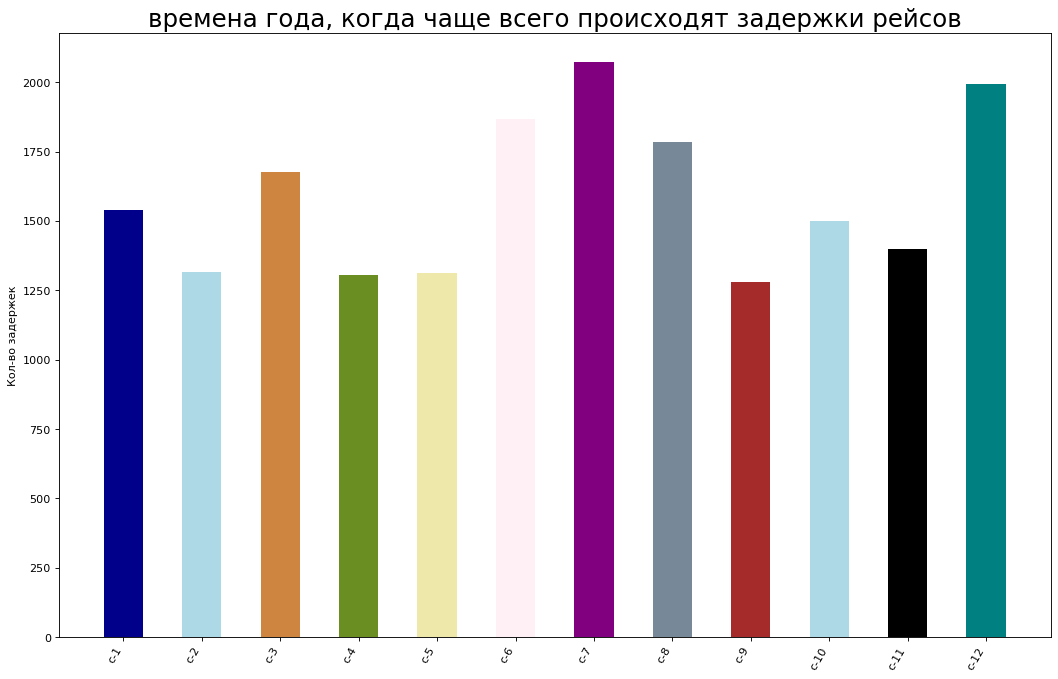

In [42]:
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
n = len(mes)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(dates, mes, color=c, width=.5)


# Decoration
plt.gca().set_xticklabels(dates, rotation=60, horizontalalignment= 'right')
plt.title("времена года, когда чаще всего происходят задержки рейсов", fontsize=22)
plt.ylabel('Кол-во задержек')
plt.show()

In [52]:
indexes = []
a = []
maximums = []
companies = []
dest_unique = np.unique(np.array(data['UniqueCarrier']))
for i in range(len(dest_unique)):
    a.append((data[(data['UniqueCarrier'] == dest_unique[i]) & (data['dep_delayed_15min'] == 'N')]).dep_delayed_15min.count())
for p in range(10):
    maximums.append(max(a))
    indexes.append(a.index(max(a)))
    a[a.index(max(a))] = 0
for i in indexes:
    companies.append(dest_unique[i])
print(maximums)

[11863, 7648, 6755, 6113, 5995, 5554, 5397, 5328, 4875, 3786]


In [ ]:
import random
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
n = len(companies)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(companies, maximums, color=c, width=.5)


# Decoration
plt.gca().set_xticklabels(companies, rotation=60, horizontalalignment= 'right')
plt.title("топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы", fontsize=22)
plt.ylabel('Кол-во задержек')
plt.show()


In [ ]:
data

In [ ]:
indexes = []
a = []
maximums = []
companies = []
dest_unique = np.unique(np.array(data['Dest']))
for i in range(len(dest_unique)):
    a.append((data[(data['Dest'] == dest_unique[i]) & (data['dep_delayed_15min'] == 'Y')]).dep_delayed_15min.count())
for p in range(10):
    maximums.append(max(a))
    indexes.append(a.index(max(a)))
    a[a.index(max(a))] = 0
for i in indexes:
    companies.append(dest_unique[i])
print(maximums)

In [ ]:
import random
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
n = len(companies)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(companies, maximums, color=c, width=.5)


# Decoration
plt.gca().set_xticklabels(companies, rotation=60, horizontalalignment= 'right')
plt.title("топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки", fontsize=22)
plt.ylabel('Кол-во задержек')
plt.show()


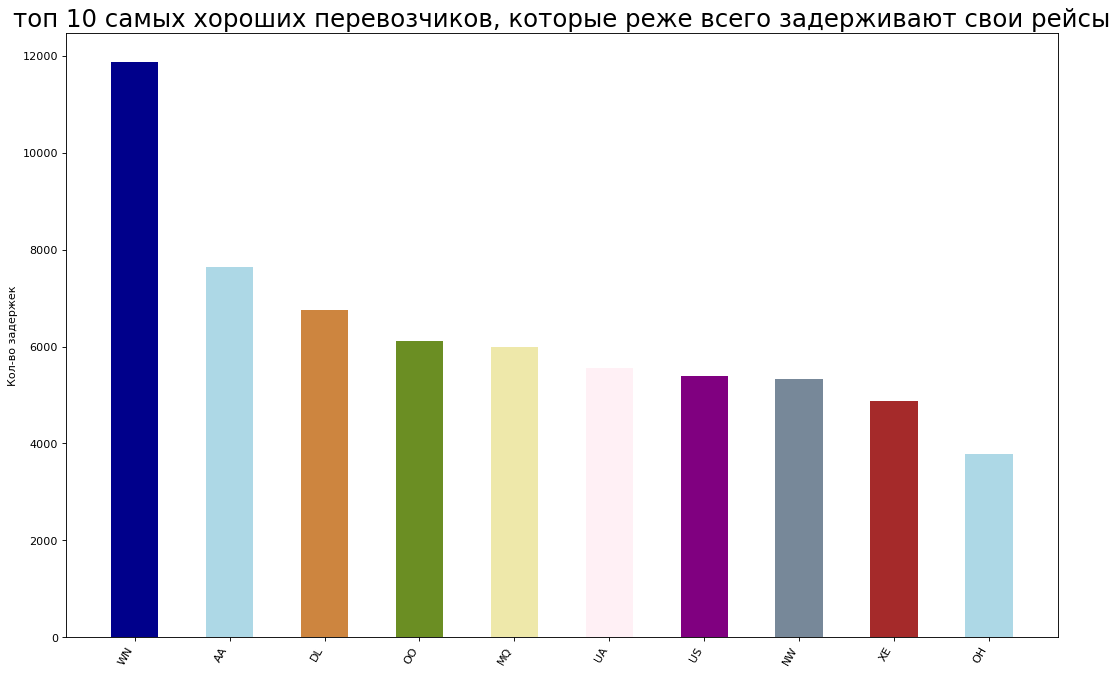

In [45]:
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [57]:
indexes = []
a = []
maximums = []
companies = []
dest_unique = np.unique(np.array(data['Dest']))
for i in range(len(dest_unique)):
    a.append((data[(data['Dest'] == dest_unique[i]) & (data['dep_delayed_15min'] == 'Y')]).dep_delayed_15min.count())
for p in range(10):
    maximums.append(max(a))
    indexes.append(a.index(max(a)))
    a[a.index(max(a))] = 0
for i in indexes:
    companies.append(dest_unique[i])
print(maximums)

[1281, 1072, 656, 584, 525, 520, 464, 457, 409, 397]


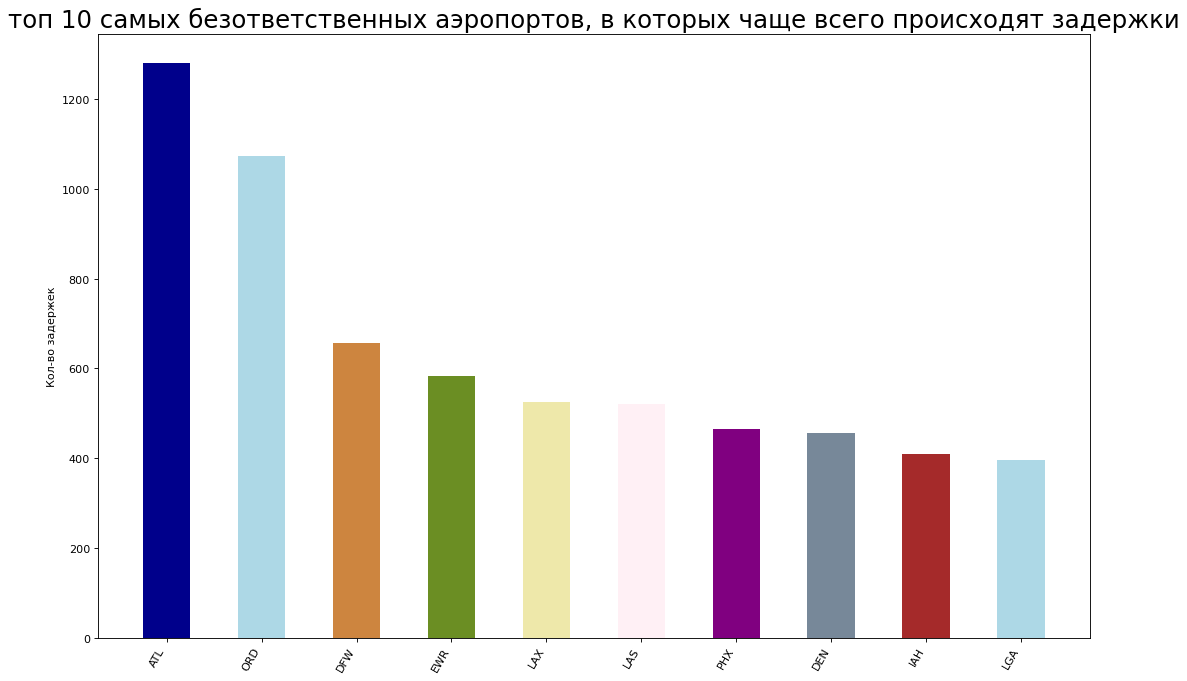

In [59]:
import random
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
n = len(companies)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(companies, maximums, color=c, width=.5)


# Decoration
plt.gca().set_xticklabels(companies, rotation=60, horizontalalignment= 'right')
plt.title("топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки", fontsize=22)
plt.ylabel('Кол-во задержек')
plt.show()
